# Testes de Hipótese

Neste desafio, vamos praticar um pouco sobre testes de hipóteses. Utilizaremos o _data set_ [2016 Olympics in Rio de Janeiro](https://www.kaggle.com/rio2016/olympic-games/), que contém dados sobre os atletas das Olimpíadas de 2016 no Rio de Janeiro.

Esse _data set_ conta com informações gerais sobre 11538 atletas como nome, nacionalidade, altura, peso e esporte praticado. Estaremos especialmente interessados nas variáveis numéricas altura (`height`) e peso (`weight`). As análises feitas aqui são parte de uma Análise Exploratória de Dados (EDA).


## _Setup_ geral

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
import datetime
import statsmodels.api as sm

In [3]:
athletes = pd.read_csv("athletes.csv")

In [4]:
def get_sample(df, col_name, n=100, seed=42):
    """Get a sample from a column of a dataframe.
    
    It drops any numpy.nan entries before sampling. The sampling
    is performed without replacement.
    
    Example of numpydoc for those who haven't seen yet.
    
    Parameters
    ----------
    df : pandas.DataFrame
        Source dataframe.
    col_name : str
        Name of the column to be sampled.
    n : int
        Sample size. Default is 100.
    seed : int
        Random seed. Default is 42.
    
    Returns
    -------
    pandas.Series
        Sample of size n from dataframe's column.
    """
    np.random.seed(seed)
    
    random_idx = np.random.choice(df[col_name].dropna().index, size=n, replace=False)
    
    return df.loc[random_idx, col_name]

## Inicia sua análise a partir daqui

 # Visão Geral

In [5]:
athletes.shape #Formato do Dataframe

(11538, 11)

In [6]:
athletes.columns #Colunas

Index(['id', 'name', 'nationality', 'sex', 'dob', 'height', 'weight', 'sport',
       'gold', 'silver', 'bronze'],
      dtype='object')

In [7]:
athletes.dtypes.value_counts() #Quantidade de tipos de dados

object     5
int64      4
float64    2
dtype: int64

In [8]:
athletes.isna().sum() # Valores faltantes no dataframe

id               0
name             0
nationality      0
sex              0
dob              1
height         330
weight         659
sport            0
gold             0
silver           0
bronze           0
dtype: int64

In [9]:
athletes.nationality.nunique() # Número de países participantes

207

In [10]:
athletes.sport.unique()# Esportes incluídos nas Olímpiadas 

array(['athletics', 'fencing', 'taekwondo', 'cycling', 'triathlon',
       'volleyball', 'aquatics', 'rugby sevens', 'wrestling', 'football',
       'shooting', 'boxing', 'equestrian', 'rowing', 'judo', 'handball',
       'badminton', 'hockey', 'modern pentathlon', 'table tennis',
       'canoe', 'basketball', 'golf', 'archery', 'weightlifting',
       'sailing', 'tennis', 'gymnastics'], dtype=object)

In [11]:
athletes.head() #Visão das 5 primeiras observações

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


# Análise Exploratória de Dados (EDA)

### Países com maior número de atletas

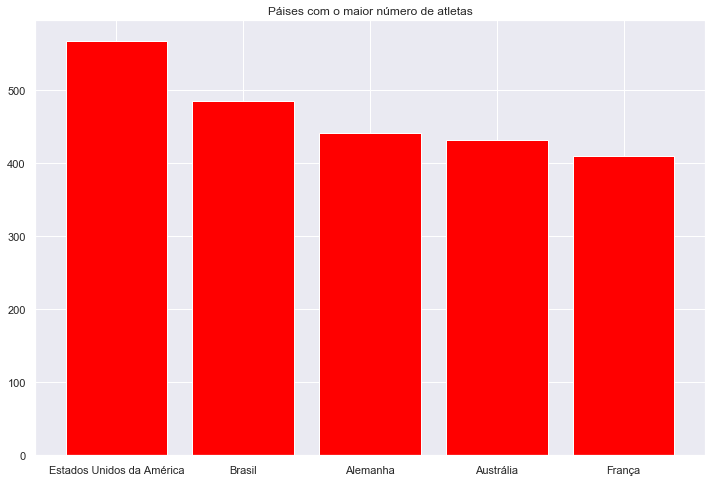

In [12]:
top_paises = athletes.nationality.value_counts().sort_values(ascending=False).head()
plt.bar(x=['Estados Unidos da América', 'Brasil', 'Alemanha', 'Austrália', 'França'], 
        height= top_paises.values,
        color='red');
plt.title('Páises com o maior número de atletas');

### Esportes com as maiores quantidades de atletas

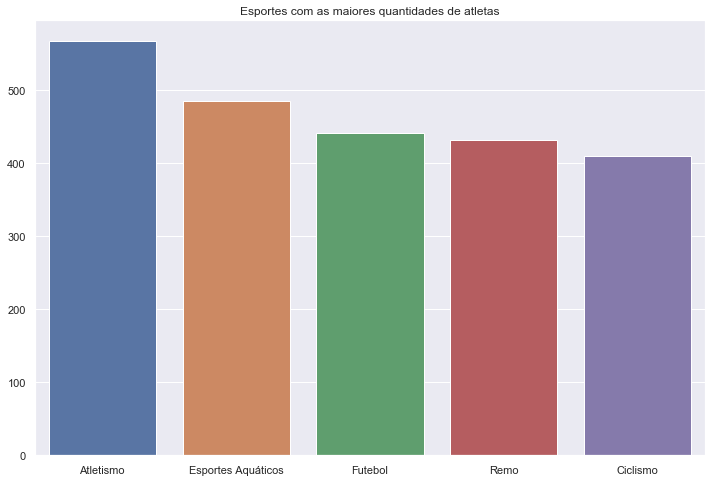

In [13]:
top_esportes = athletes.sport.value_counts().sort_values(ascending=False).head()
sns.barplot(x=['Atletismo','Esportes Aquáticos','Futebol', 'Remo', 'Ciclismo'],
            y= top_paises.values);
plt.title('Esportes com as maiores quantidades de atletas');

### Top 10 países ganhadores de medalhas de acordo com medalhas de ouro

In [14]:
athletes['total_medalhas'] = athletes['gold'] + athletes['silver']+athletes['bronze']
top_paises_totalmedalhas = athletes.groupby('nationality')[['gold','silver','bronze', 'total_medalhas']].sum().sort_values(ascending=False,by='gold').head(10)
top_paises_totalmedalhas

,gold,silver,bronze,total_medalhas
nationality,,,,
USA,139,54,71,264
GBR,64,55,26,145
RUS,52,29,34,115
GER,49,44,67,160
CHN,46,30,37,113
BRA,37,8,6,51
AUS,23,34,25,82
ARG,21,1,0,22
FRA,20,54,21,95


### Top 10 países ganhadores de medalhas de acordo com total de medalhas

In [15]:
top_paises_totalmedalhas.sort_values(ascending=False,by='total_medalhas')

,gold,silver,bronze,total_medalhas
nationality,,,,
USA,139,54,71,264
GER,49,44,67,160
GBR,64,55,26,145
RUS,52,29,34,115
CHN,46,30,37,113
FRA,20,54,21,95
AUS,23,34,25,82
JPN,17,13,35,65
BRA,37,8,6,51


In [16]:
athletes.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze,total_medalhas
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0,0


In [17]:
# Transformando a coluna Dob para o tipo datetime
athletes['dob'] = pd.to_datetime(athletes.dob, format='%m/%d/%y')
athletes.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze,total_medalhas
0,736041664,A Jesus Garcia,ESP,male,1969-10-17,1.72,64.0,athletics,0,0,0,0
1,532037425,A Lam Shin,KOR,female,1986-09-23,1.68,56.0,fencing,0,0,0,0
2,435962603,Aaron Brown,CAN,male,1992-05-27,1.98,79.0,athletics,0,0,1,1
3,521041435,Aaron Cook,MDA,male,1991-01-02,1.83,80.0,taekwondo,0,0,0,0
4,33922579,Aaron Gate,NZL,male,1990-11-26,1.81,71.0,cycling,0,0,0,0


# Resolução das questões:

In [58]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
# questão 1
amostra = get_sample(athletes, 'height', n=3000, seed=42)
shap = sct.shapiro(amostra)
shap[1] > 0.05

False

In [72]:
# questão 2
amostra = get_sample(athletes, 'height', n=3000, seed=42)
jar = sct.jarque_bera(amostra)
jar[1] >= 0.05

False

In [77]:
# questão 3
amostra2 = get_sample(athletes, 'weight', n=3000, seed=42)
dagost = sct.normaltest(amostra2)
dagost[1] >= 0.05

False

In [99]:
# questão 4
weight_log = np.log(get_sample(athletes, 'weight', n=3000, seed=42))
dagost_log = sct.normaltest(weight_log)
dagost_log[1] >= 0.05

False

In [134]:
# questão 5
bra = athletes[athletes['nationality']=='BRA']
usa = athletes[athletes['nationality']=='USA']
tt = sct.ttest_ind(bra['height'],usa['height'], equal_var=False, nan_policy='omit') 
#Na função do t-test, deve-se utilizar a distribuição dos pesos como inteiro e não usar a média 
tt[1] >= 0.05

False

In [144]:
# questão 6
can = athletes[athletes['nationality']=='CAN']
tt2 = sct.ttest_ind(bra['height'],can['height'], equal_var=False, nan_policy='omit')
tt2[1] >= 0.05

True

Repita o procedimento da questão 6, mas agora entre as alturas de usa e can. Qual o valor do p-valor retornado? Responda como um único escalar arredondado para oito casas decimais.

In [147]:
tt3 = sct.ttest_ind(usa['height'],can['height'], equal_var=False, nan_policy='omit')
tt3[1].round(8)

0.00046601

## Questão 1

Considerando uma amostra de tamanho 3000 da coluna `height` obtida com a função `get_sample()`, execute o teste de normalidade de Shapiro-Wilk com a função `scipy.stats.shapiro()`. Podemos afirmar que as alturas são normalmente distribuídas com base nesse teste (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [43]:
def q1():
    amostra = get_sample(athletes, 'height', n=3000, seed=42)
    shap = sct.shapiro(amostra)
    return shap[1] > 0.05

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Plote o qq-plot para essa variável e a analise.
* Existe algum nível de significância razoável que nos dê outro resultado no teste? (Não faça isso na prática. Isso é chamado _p-value hacking_, e não é legal).

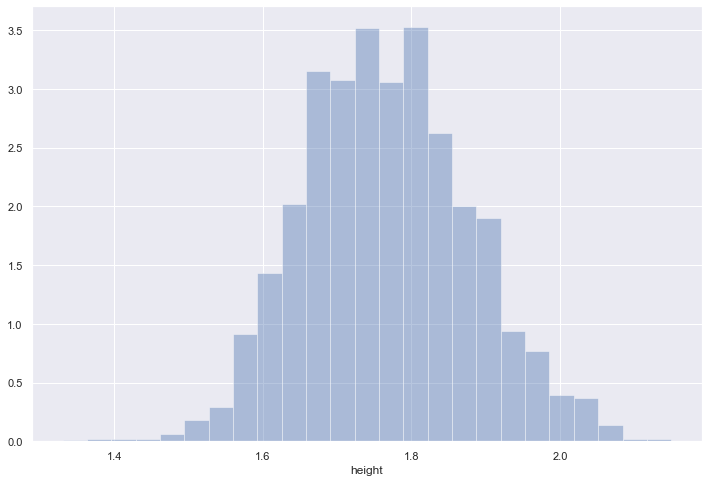

In [45]:
sns.distplot(amostra, kde=False, bins=25, hist_kws={"density": True});

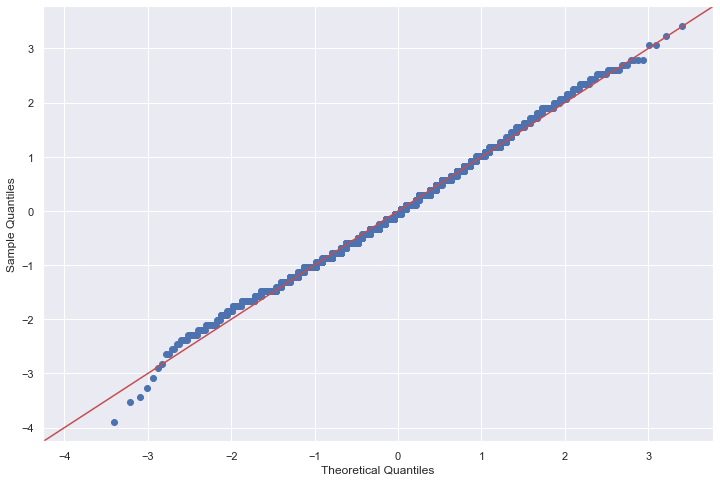

In [67]:
sm.qqplot(amostra, fit=True, line="45");

A forma do gráfico e o resultado do teste não condizem. Isto é, a amostra apresenta uma distribuição normal enquanto o valor-p sugere que há significância estatística para negarmos a hipótese nula, ou seja, a hipótese de que a distribuição das alturas segue uma distribuição normal.

Essa constatação é reforçada pelo gráfico qq-plot. O que esse gráfico faz é plotar uma comparação de distribuições de probabilidades. Geralmente, uma das distribuições é teórica e com distribuição bem conhecida. Essa distribuição teórica é convencionalmente posta no eixo x. No eixo y, colocamos os quantis da nossa distribuição amostral, que gostaríamos de comparar com a teórica. O resultado do nosso qq-plot aponta que a amostra segue uma distribuição normal.

O que ocorreu foi um erro do Tipo I ou falso positivo. Isso corresponde a um erro em que negamos a hipótese nula ainda que ela seja verdadeira. O próprio nível de significância comporta esse tipo de erro, de modo que, de todas as amostra possíveis de serem retiradas da população `height`, temos 5% de probabilidade em incorrer nesse erro.

## Questão 2

Repita o mesmo procedimento acima, mas agora utilizando o teste de normalidade de Jarque-Bera através da função `scipy.stats.jarque_bera()`. Agora podemos afirmar que as alturas são normalmente distribuídas (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [153]:
def q2():
    amostra = get_sample(athletes, 'height', n=3000, seed=42)
    jar = sct.jarque_bera(amostra)
    return bool(jar[1] > 0.05)

__Para refletir__:

* Esse resultado faz sentido?

Tal como o teste de Shapiro-Wilk, o teste de Jarque-Bera é um teste de aderência à distribuição normal, um teste de normalidade, em que a 𝐻0 representa a normalidade dos dados. A diferença reside na estatística de teste utilizada.

A estatística de teste é baseada na assimetria (skewness) e curtose (kurtosis) excessiva da amostra. Se a amostra vem de uma distribuição normal, então esses valores devem ser muito próximos de zero.

No nosso caso, por mais que a estatística de teste e o valor-p sejam diferentes, acredito que esse último ainda aponte para uma rejeição da hipótese nula e, portanto, incorrendo no mesmo erro Tipo I por conta de ser a mesma amostra 

## Questão 3

Considerando agora uma amostra de tamanho 3000 da coluna `weight` obtida com a função `get_sample()`. Faça o teste de normalidade de D'Agostino-Pearson utilizando a função `scipy.stats.normaltest()`. Podemos afirmar que os pesos vêm de uma distribuição normal ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [154]:
def q3():
    amostra2 = get_sample(athletes, 'weight', n=3000, seed=42)
    dagost = sct.normaltest(amostra2)
    return bool(dagost[1] >= 0.05)

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Um _box plot_ também poderia ajudar a entender a resposta.

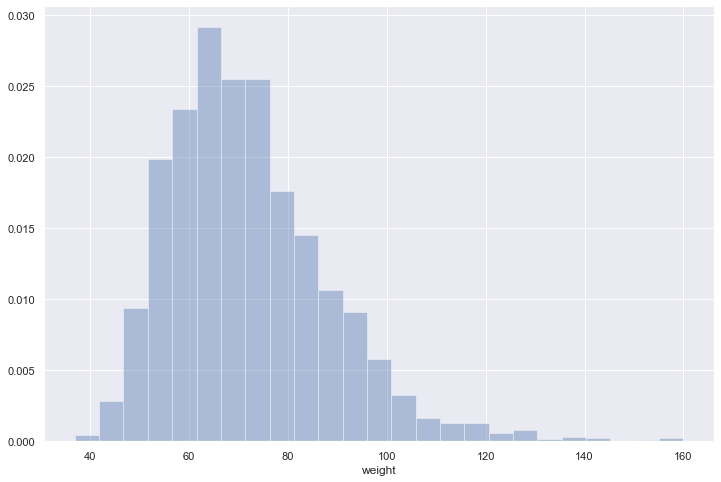

In [79]:
sns.distplot(amostra2, kde=False, bins=25, hist_kws={"density": True});

Nessa questão, a forma do histrograma e o resultado do test de hipótese D'Agostino-Pearson são condizentes tendo em vista que o gráfico evidencia que a amostra possui uma assimestra positiva (positive skew), uma vez que sua calda direita é mais alongada. Essa forma de distribuição apresenta uma média maior do que a mediana que, por sua vez, é maior do que a moda.

Vale destacar que o valor-p (`1.5898922918029537e-111`) é muito menor do que o nível de significância, o que aponta para uma significância estatística da estatística de teste no sentido de rejeitar a hipótese nula.

## Questão 4

Realize uma transformação logarítmica em na amostra de `weight` da questão 3 e repita o mesmo procedimento. Podemos afirmar a normalidade da variável transformada ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [155]:
def q4():
    weight_log = np.log(get_sample(athletes, 'weight', n=3000, seed=42))
    dagost_log = sct.normaltest(weight_log)
    return bool(dagost_log[1] > 0.05)

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Você esperava um resultado diferente agora?

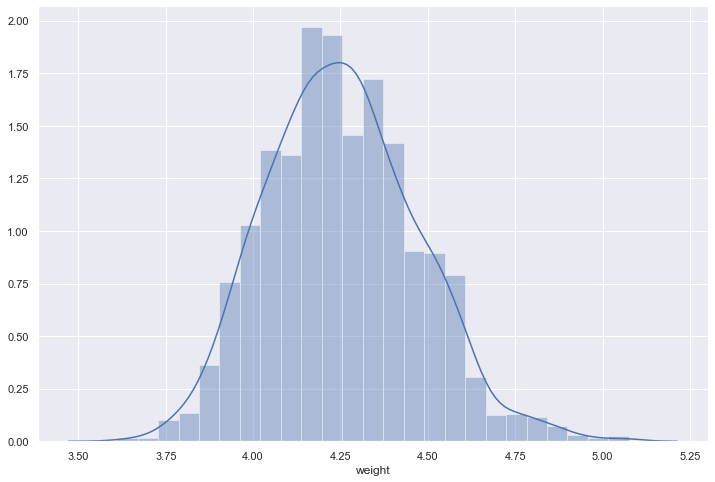

In [94]:
sns.distplot(weight_log, bins=25, hist_kws={"density": True});

O formato do gráfico e o resultado do teste não condizem, tendo em vista que o teste sugere a rejeição da hipótese nula, enquanto a amostra dos pesos no formato logarítmico tende a apresentar uma distribuição normal das observações.

> __Para as questão 5 6 e 7 a seguir considere todos testes efetuados ao nível de significância de 5%__.

## Questão 5

Obtenha todos atletas brasileiros, norte-americanos e canadenses em `DataFrame`s chamados `bra`, `usa` e `can`,respectivamente. Realize um teste de hipóteses para comparação das médias das alturas (`height`) para amostras independentes e variâncias diferentes com a função `scipy.stats.ttest_ind()` entre `bra` e `usa`. Podemos afirmar que as médias são estatisticamente iguais? Responda com um boolean (`True` ou `False`).

In [156]:
def q5():
    bra = athletes[athletes['nationality']=='BRA']
    usa = athletes[athletes['nationality']=='USA']
    tt = sct.ttest_ind(bra['height'],usa['height'], equal_var=False, nan_policy='omit') 
    return bool(tt[1] > 0.05)

## Questão 6

Repita o procedimento da questão 5, mas agora entre as alturas de `bra` e `can`. Podemos afimar agora que as médias são estatisticamente iguais? Reponda com um boolean (`True` ou `False`).

In [143]:
def q6():
    can = athletes[athletes['nationality']=='CAN']
    tt2 = sct.ttest_ind(bra['height'],can['height'], equal_var=False, nan_policy='omit')
    return bool(tt2[1] > 0.05)

## Questão 7

Repita o procedimento da questão 6, mas agora entre as alturas de `usa` e `can`. Qual o valor do p-valor retornado? Responda como um único escalar arredondado para oito casas decimais.

In [148]:
def q7():
    tt3 = sct.ttest_ind(usa['height'],can['height'], equal_var=False, nan_policy='omit')
    return float(tt3[1].round(8))

__Para refletir__:

* O resultado faz sentido?
* Você consegue interpretar esse p-valor?
* Você consegue chegar a esse valor de p-valor a partir da variável de estatística?

Esse resultado faz sentido porque o p-valor é menor do que o nível de significância o que significa que há significância estatística para rejeitar a hipótese nula de que a média populacional das respectivas amostra é igual.